In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("Clean_Dataset.csv")
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
print("Number of Columns:", df.shape[1])
print("Number of Rows:", df.shape[0])

Number of Columns: 12
Number of Rows: 300153


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [6]:
df.isnull().sum()

,0
Unnamed: 0,0
airline,0
flight,0
source_city,0
departure_time,0
stops,0
arrival_time,0
destination_city,0
class,0
duration,0


In [7]:
print("Number of Duplicates: ", df.duplicated().sum())

Number of Duplicates:  0


In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,300153.0,150076.000000,86646.852011,0.00,75038.00,150076.00,225114.00,300152.00
duration,300153.0,12.221021,7.191997,0.83,6.83,11.25,16.17,49.83
days_left,300153.0,26.004751,13.561004,1.00,15.00,26.00,38.00,49.00
price,300153.0,20889.660523,22697.767366,1105.00,4783.00,7425.00,42521.00,123071.00


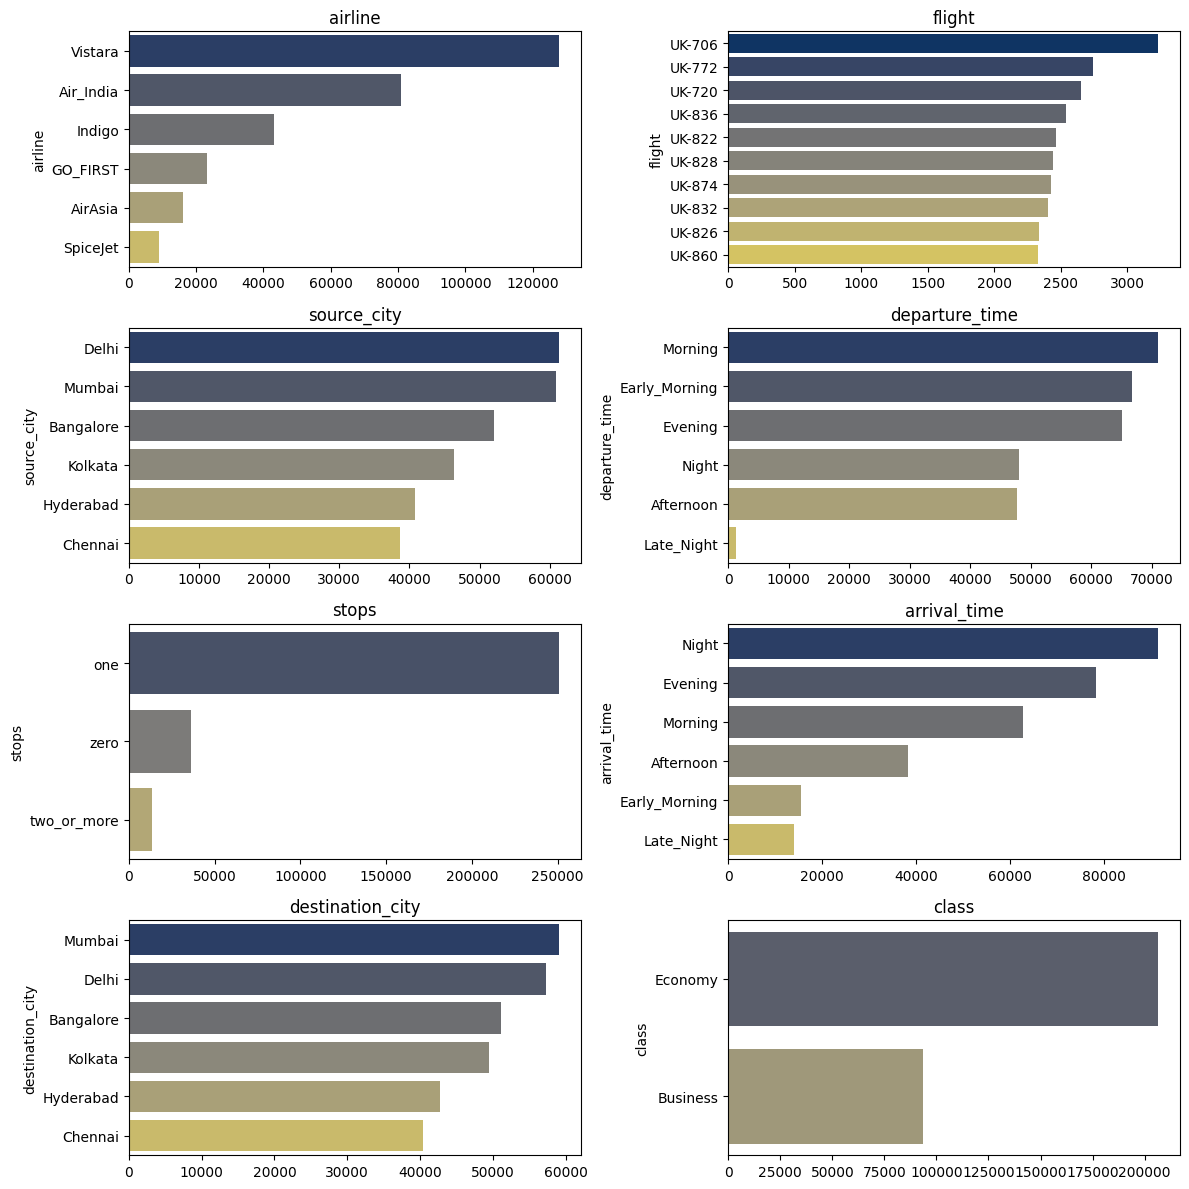

In [13]:
plt.figure(figsize=(12, 12))
for i, feature in enumerate(df.select_dtypes(include="object").columns):
    counts = df[feature].value_counts().head(10)
    plt.subplot(4, 2, i+1)
    sns.barplot(x=counts.values, y=counts.index, palette = 'cividis')
    plt.title(f"{feature}")
plt.tight_layout()

In [10]:
economy_df = df[df["class"] == "Economy"]
business_df = df[df["class"] == "Business"]

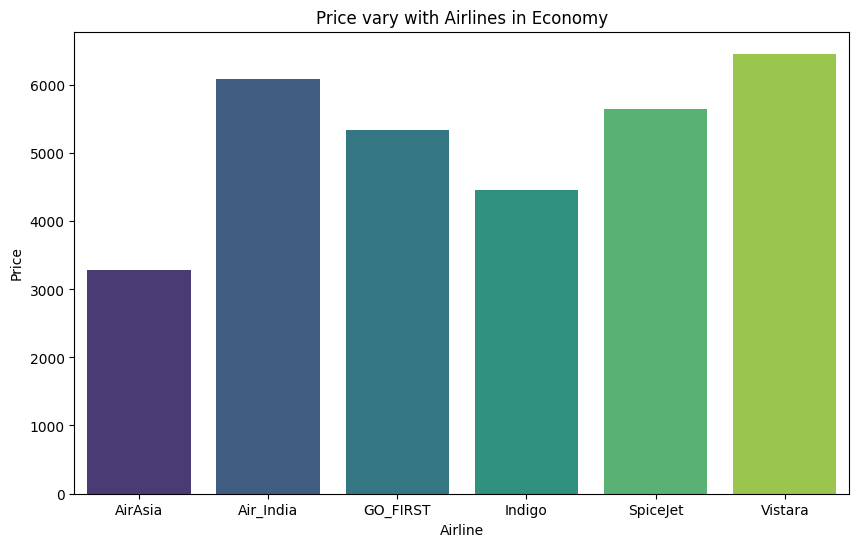

In [14]:
price_in_economy = economy_df.groupby("airline")["price"].median()

plt.figure(figsize=(10, 6))
sns.barplot(x=price_in_economy.index, y=price_in_economy.values, palette="viridis")
plt.title("Price vary with Airlines in Economy")
plt.xlabel("Airline")
plt.ylabel("Price")
plt.show()

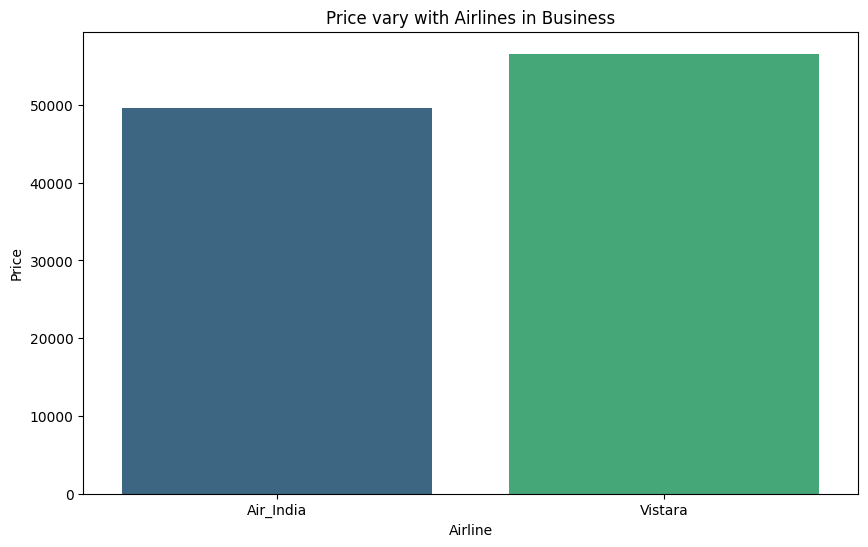

In [15]:
price_in_business = business_df.groupby("airline")["price"].median()

plt.figure(figsize=(10, 6))
sns.barplot(x=price_in_business.index, y=price_in_business.values, palette="viridis")
plt.title("Price vary with Airlines in Business")
plt.xlabel("Airline")
plt.ylabel("Price")
plt.show()

In [16]:
one_day = df[(df["days_left"] == 1) & (df["class"] == "Economy")]["price"].median()
two_days = df[(df["days_left"] == 2) & (df["class"] == "Economy")]["price"].median()

In [17]:
print("The median price when tickets are bought in just 1 day before departure: ", one_day)
print("The median price when tickets are bought in just 2 days before departure: ", two_days)

The median price when tickets are bought in just 1 day before departure:  14150.0
The median price when tickets are bought in just 2 days before departure:  13212.0


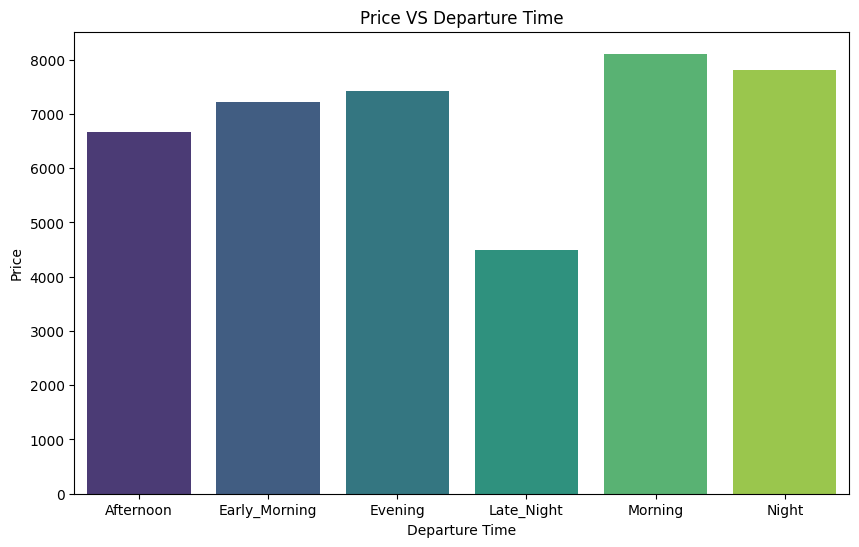

In [18]:
departure_time = df.groupby("departure_time")["price"].median()

plt.figure(figsize=(10, 6))
sns.barplot(x=departure_time.index, y=departure_time.values, palette="viridis")
plt.title("Price VS Departure Time")
plt.xlabel("Departure Time")
plt.ylabel("Price")
plt.show()

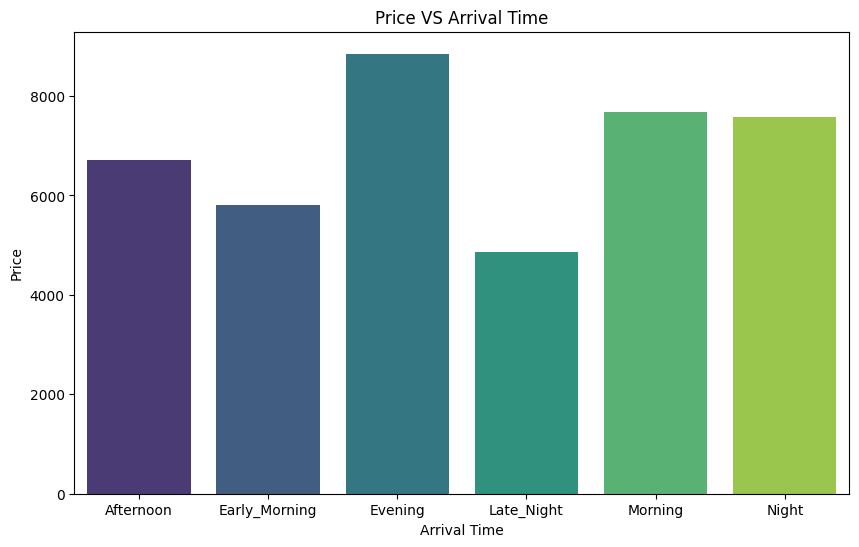

In [19]:
arrival_time = df.groupby("arrival_time")["price"].median()

plt.figure(figsize=(10, 6))
sns.barplot(x=arrival_time.index, y=arrival_time.values, palette="viridis")
plt.title("Price VS Arrival Time")
plt.xlabel("Arrival Time")
plt.ylabel("Price")
plt.show()

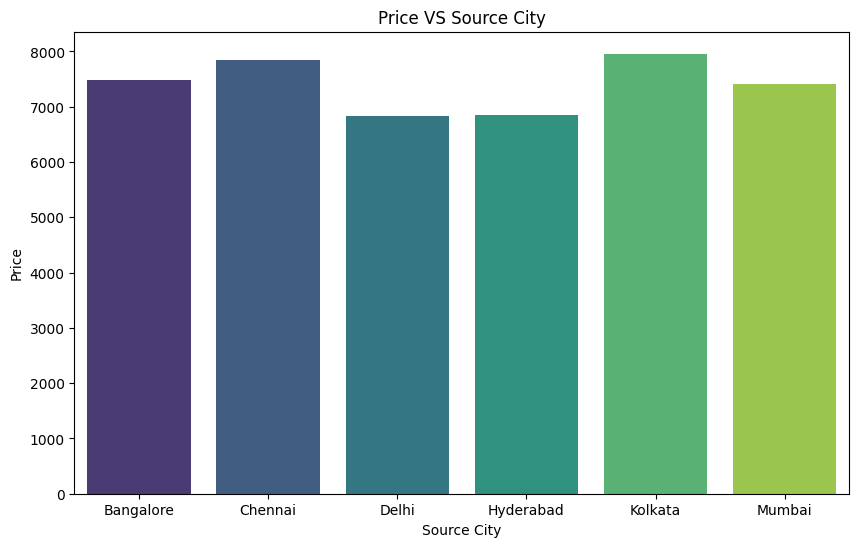

In [20]:
source_city = df.groupby("source_city")["price"].median()

plt.figure(figsize=(10, 6))
sns.barplot(x=source_city.index, y=source_city.values, palette="viridis")
plt.title("Price VS Source City")
plt.xlabel("Source City")
plt.ylabel("Price")
plt.show()

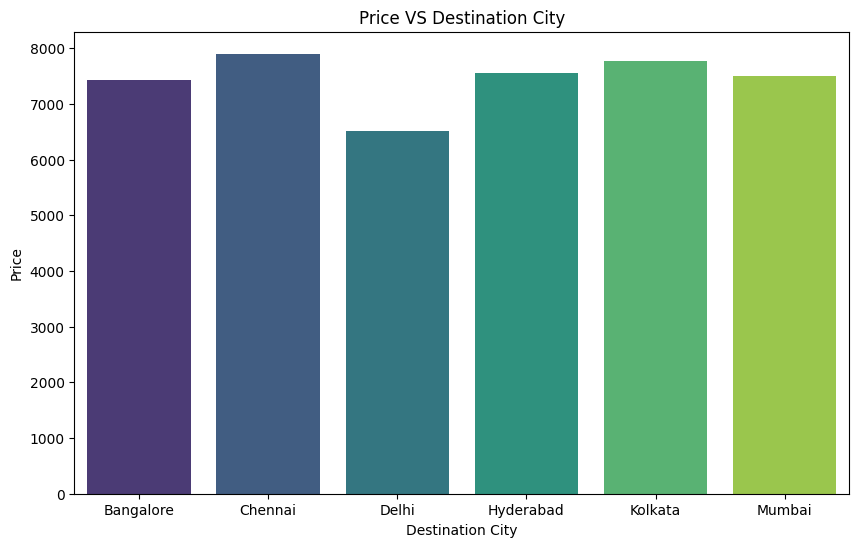

In [21]:
destination_city = df.groupby("destination_city")["price"].median()

plt.figure(figsize=(10, 6))
sns.barplot(x=destination_city.index, y=destination_city.values, palette="viridis")
plt.title("Price VS Destination City")
plt.xlabel("Destination City")
plt.ylabel("Price")
plt.show()

In [22]:
economy_price = df[df["class"] == "Economy"]["price"].median()
business_price = df[df["class"] == "Business"]["price"].median()

In [23]:
print("The Median Price in Economy: ", economy_price)
print("The Median Price in Business: ", business_price)

The Median Price in Economy:  5772.0
The Median Price in Business:  53164.0


In [24]:
encoder = LabelEncoder()

df["airline"] = encoder.fit_transform(df["airline"])
df["source_city"] = encoder.fit_transform(df["source_city"])
df["departure_time"] = encoder.fit_transform(df["departure_time"])
df["stops"] = encoder.fit_transform(df["stops"])
df["arrival_time"] = encoder.fit_transform(df["arrival_time"])
df["destination_city"] = encoder.fit_transform(df["destination_city"])
df["class"] = encoder.fit_transform(df["class"])

In [25]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,4,SG-8709,2,2,2,5,5,1,2.17,1,5953
1,1,4,SG-8157,2,1,2,4,5,1,2.33,1,5953
2,2,0,I5-764,2,1,2,1,5,1,2.17,1,5956
3,3,5,UK-995,2,4,2,0,5,1,2.25,1,5955
4,4,5,UK-963,2,4,2,4,5,1,2.33,1,5955


In [26]:
df.drop(["Unnamed: 0", "flight"], axis=1, inplace=True)

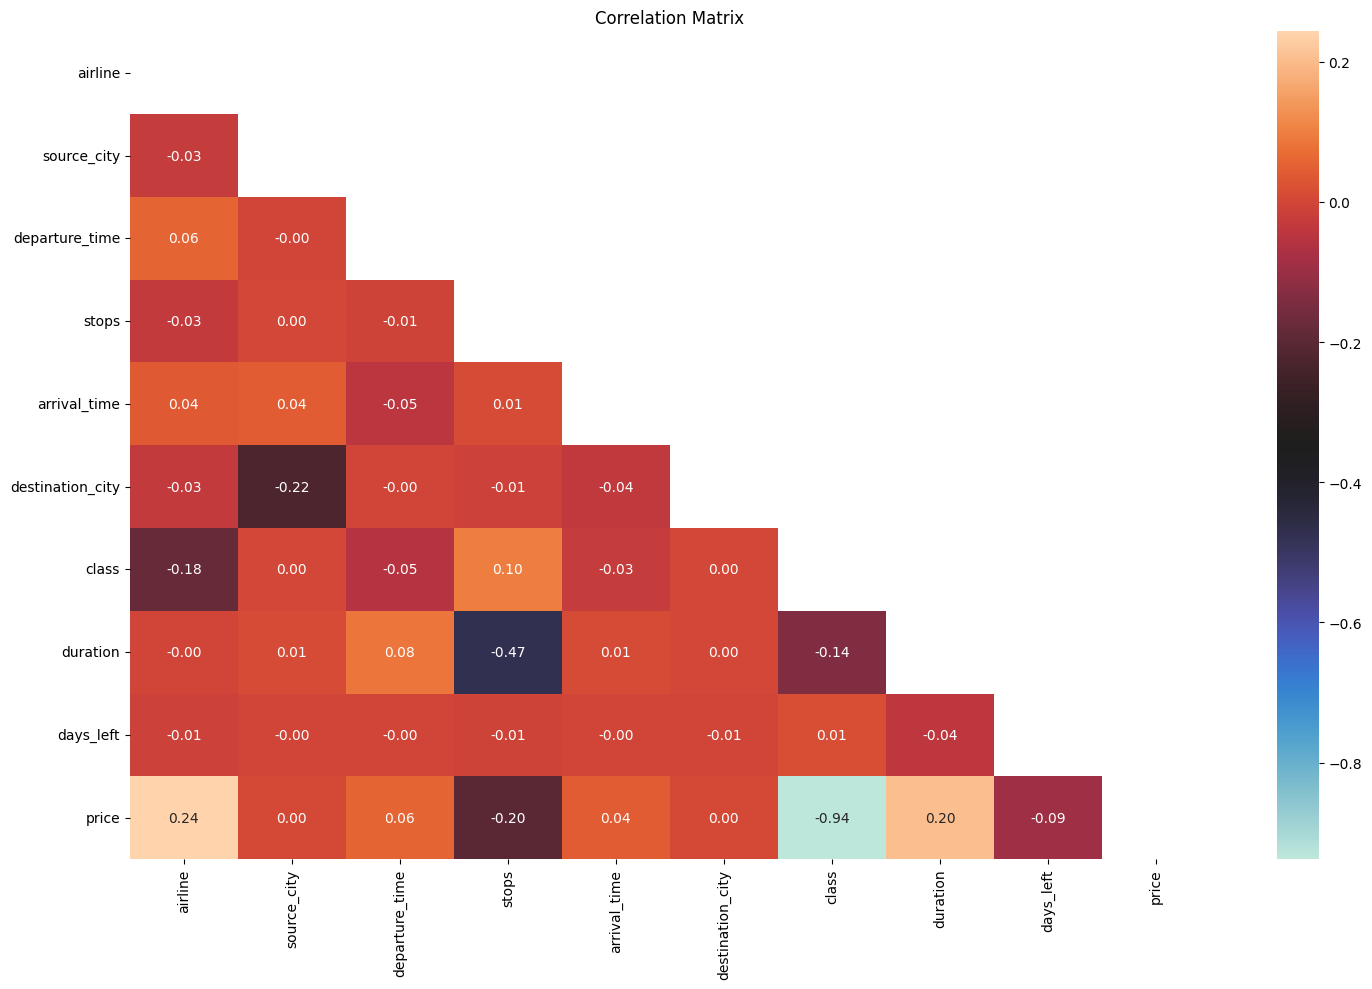

In [27]:
corr = df.corr()
mask_ut = np.triu(np.ones(corr.shape)).astype(np.bool_)

plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="icefire", mask=mask_ut)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

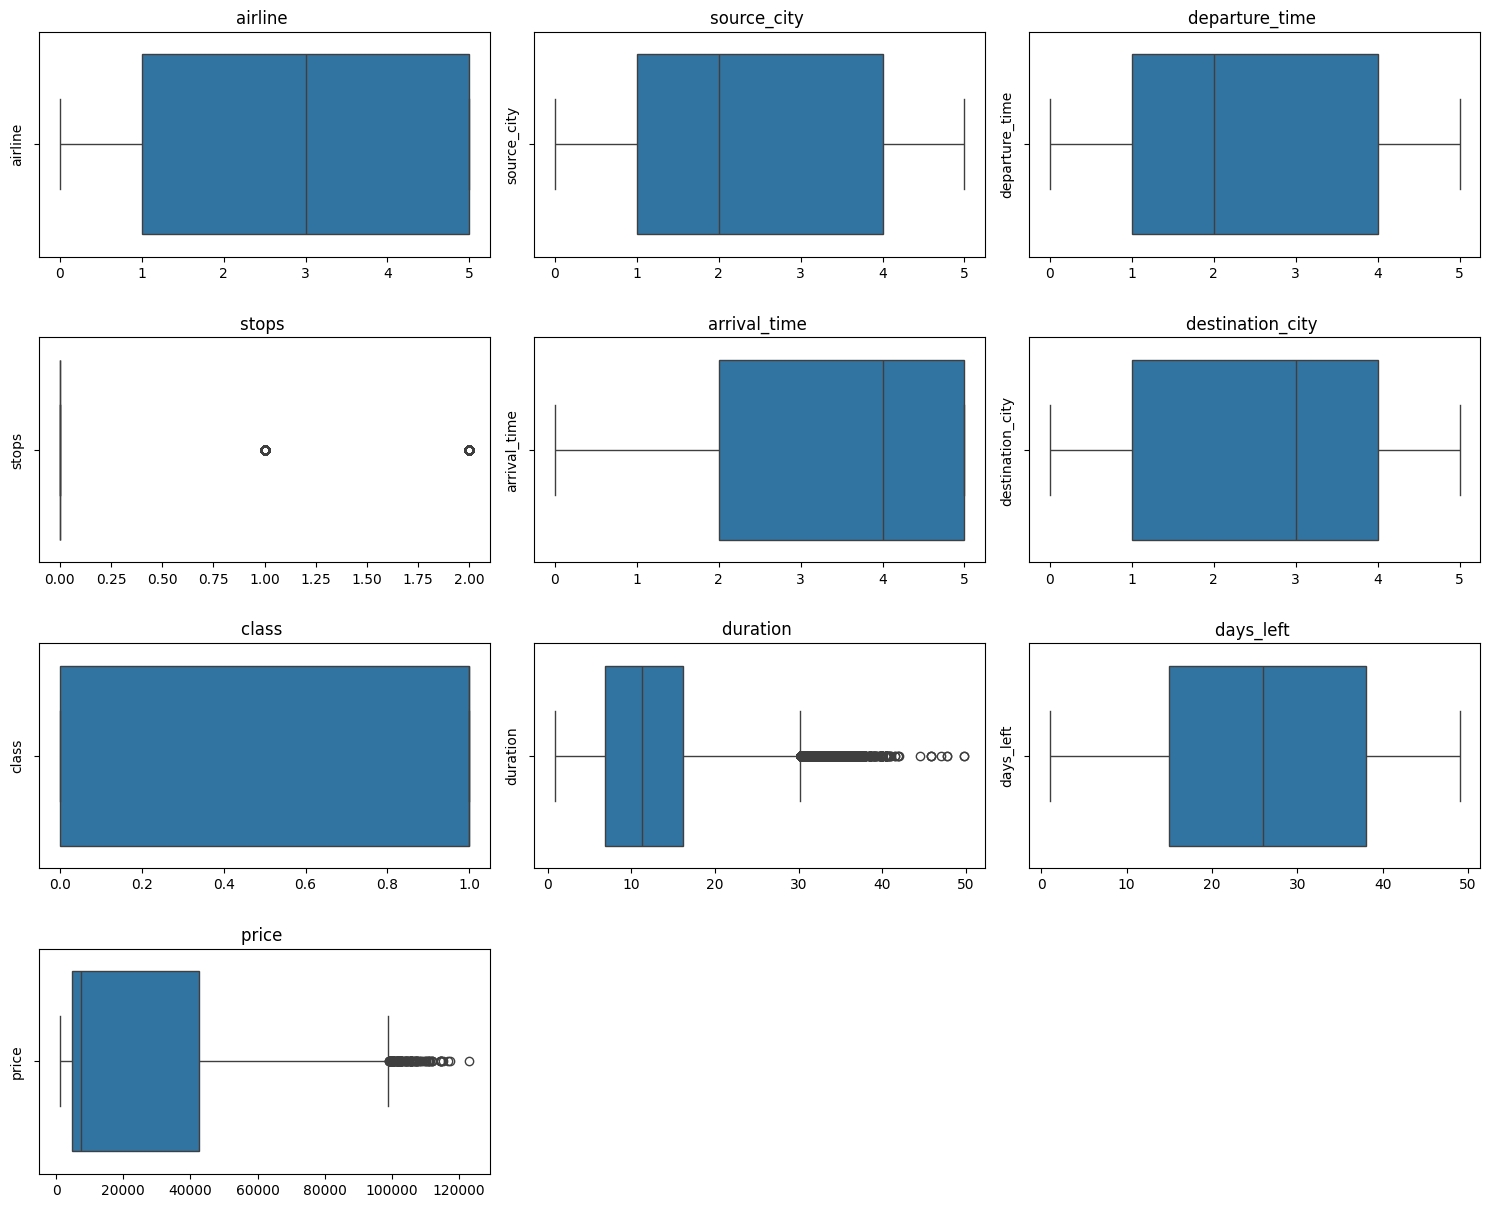

In [29]:
#Outliers Detection
plt.figure(figsize=(15, 15))
for i, feature in enumerate(df.columns):
    plt.subplot(5, 3, i+1)
    sns.boxplot(data=df, x=feature)
    plt.title(f'{feature} ')
    plt.xlabel(' ')
    plt.ylabel(feature)
plt.tight_layout()

In [30]:
q1 = df["duration"].quantile(0.25)
q3 = df["duration"].quantile(0.75)
iqr = q3 - q1

upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)

df = df.loc[(df["duration"] < upper_limit) & (df["duration"] > lower_limit)]

In [31]:
# Train Test Split
X = df.drop("price", axis=1)
y = df["price"]

In [32]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((238434, 9), (238434,), (59609, 9), (59609,))

In [33]:
reg = RandomForestRegressor(random_state=42)
reg.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [34]:
y_pred = reg.predict(x_test)

In [35]:
print("MAE: ", mean_absolute_error(y_test, y_pred))

MAE:  1076.6305771054467


In [36]:
print("R2-score: ", f"{(r2_score(y_test, y_pred) * 100):0.1f}", "%")

R2-score:  98.5 %


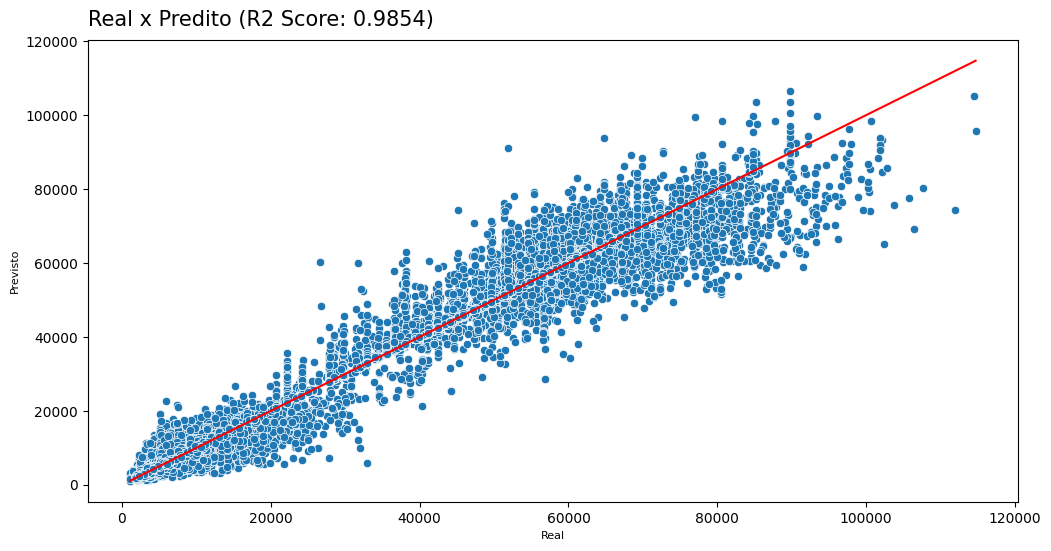

In [37]:
fig, ax = plt.subplots(figsize = (12, 6))

sns.scatterplot(x = y_test, y = y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color = 'red')
ax.set_title(f"Real x Predito (R2 Score: {r2_score(y_test, y_pred):.4f})", fontsize = 15, pad = 10, loc = 'left')
ax.set_xlabel("Real", fontsize = 8)
ax.set_ylabel("Previsto", fontsize = 8)
plt.show()